In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np  



dataTreino = pd.read_csv('datas/Train.csv')
dataTeste = pd.read_csv('datas/Test.csv')

## **Bank Marketing dataset: Term Deposits Classification**

In [13]:
dataTreino.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [14]:
dataTeste.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


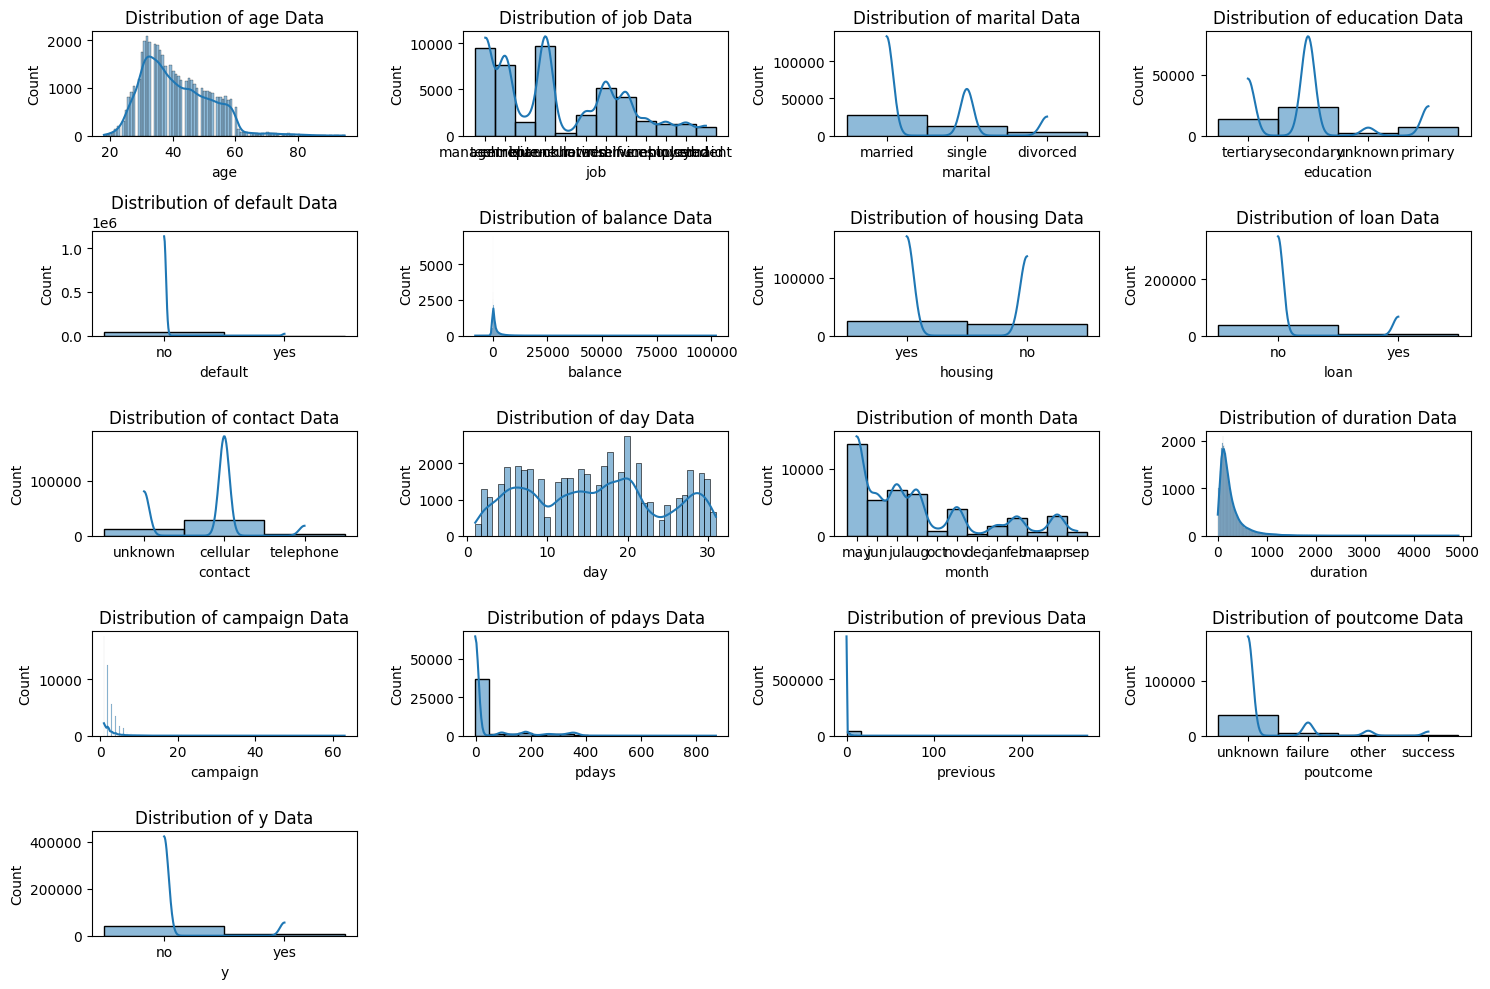

In [3]:
#vou selecionar algumas variaveis para vizualizar suas destribuições
plt.figure(figsize=(15,10))
for i,col in enumerate(dataTreino.columns,1):
    plt.subplot(5,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(dataTreino[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [4]:
labelencoder = LabelEncoder()

colunasCateg = ['job', 'marital', 'education', 'loan' ,'default', 'housing', 'contact', 'month', 'poutcome', 'y']

for coluna in colunasCateg:
    labelencoder.fit(dataTreino[coluna])
    dataTreino[coluna] = labelencoder.transform(dataTreino[coluna])
    #tambem vou usar no datateste
    dataTeste[coluna] = labelencoder.transform(dataTeste[coluna])
    

In [5]:
##separando conjunto de dados
xTreino = dataTreino.drop('y', axis = 1)
yTreino = dataTreino['y']



xTeste = dataTeste.drop('y', axis = 1)
yTeste = dataTeste['y']

In [6]:
linhas_iguais = xTeste.merge(xTreino, how='inner')

if not linhas_iguais.empty:
    print("Os DataFrames têm linhas iguais:")
    print(linhas_iguais)
else:
    print("Os DataFrames não têm linhas iguais.")

    linhas_iguas.shape

Os DataFrames têm linhas iguais:
      age  job  marital  education  default  balance  housing  loan  contact  \
0      30   10        1          0        0     1787        0     0        0   
1      33    7        1          1        0     4789        1     1        0   
2      35    4        2          2        0     1350        1     0        0   
3      30    4        1          2        0     1476        1     1        2   
4      59    1        1          1        0        0        1     0        2   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
4516   33    7        1          1        0     -333        1     0        0   
4517   57    6        1          2        1    -3313        1     1        2   
4518   57    9        1          1        0      295        0     0        0   
4519   28    1        1          1        0     1137        0     0        0   
4520   44    2        2          2        0     1136        1     1        0   

      

In [7]:
X_treino, X_teste, Y_Treino, Y_teste = train_test_split(xTreino, yTreino, random_state = 17, test_size = 0.2)

## **Árvore de Decisão Compacta**

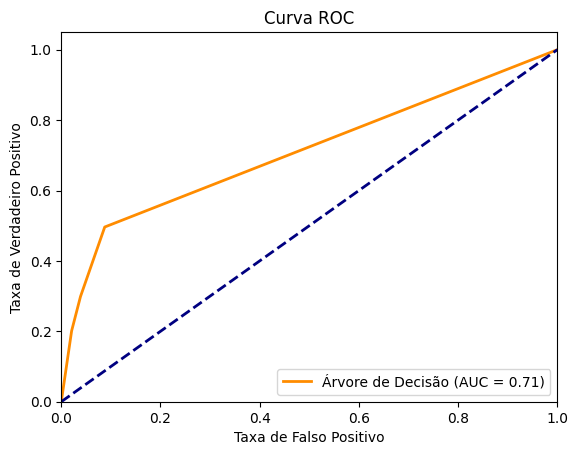

In [9]:
# Treinando uma árvore de decisão
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_treino, Y_Treino)

# Calculando probabilidades para a curva ROC
y_score_tree = tree_clf.predict_proba(X_teste)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(Y_teste, y_score_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plotando a curva ROC da árvore de decisão
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label='Árvore de Decisão (AUC = {:.2f})'.format(roc_auc_tree))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## **Treinando Outros Modelos e Calculando Curvas ROC**
Comparação com outros modelos como Random Forest, Regressão Logística, Naive Bayes e kNN

/home/rsb6/.pyenv/versions/3.12.3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


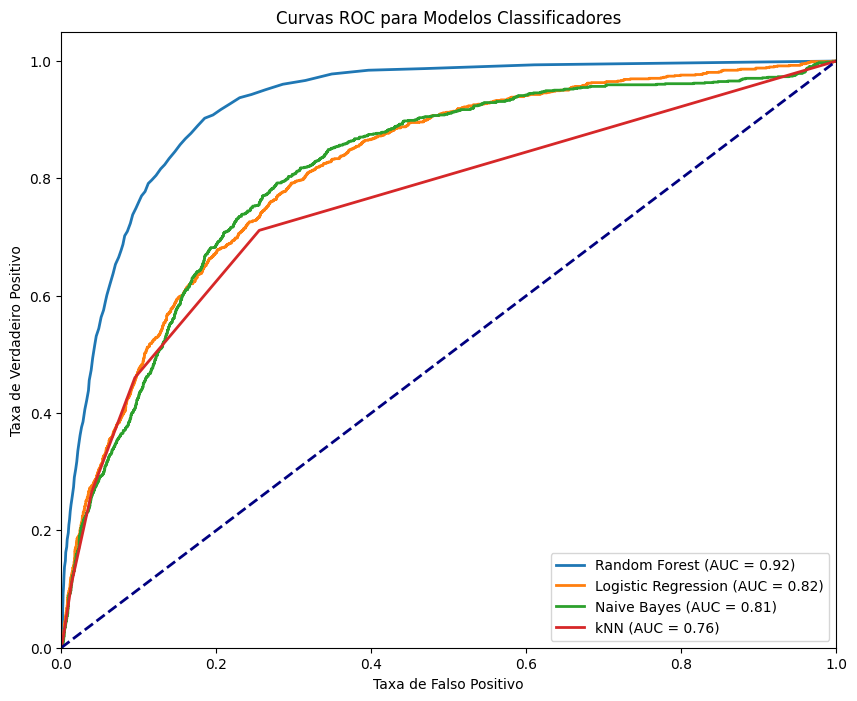

In [11]:

# Treinando modelos
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': GaussianNB(),
    'kNN': KNeighborsClassifier()
}

plt.figure(figsize=(10, 8))

# Treinando e plotando curvas ROC para cada modelo
for name, model in models.items():
    model.fit(X_treino, Y_Treino)
    y_score = model.predict_proba(X_teste)[:, 1]
    fpr, tpr, _ = roc_curve(Y_teste, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='{} (AUC = {:.2f})'.format(name, roc_auc))

# Plotando linha diagonal
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Ajustando gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curvas ROC para Modelos Classificadores')
plt.legend(loc='lower right')
plt.show()


Note que o modelo com maior performance é o Random Forest como mostrado na curva ROC acima, seguido dos outros que estão abaixo, percebemos que em comparação ao modelo de árvore treinado inicialmente, esse são muito superiores. Isso pode ter sido causado pela pouca profundidade da primeira árvore.